In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [94]:
df=pd.read_csv(r"D:\DAILY TASKS\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [95]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [96]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [98]:
df.dropna()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [99]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [100]:
df["Extracurricular Activities"].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [101]:
df[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"	,"Performance Index"]]


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


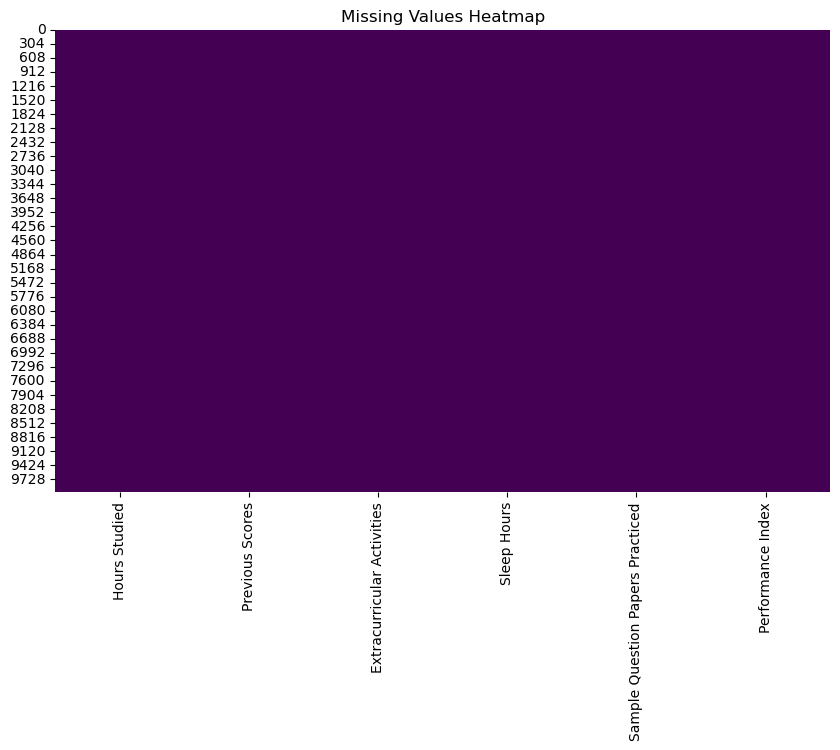

In [102]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [103]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
print("numerical_cols:",numerical_cols)

numerical_cols: Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


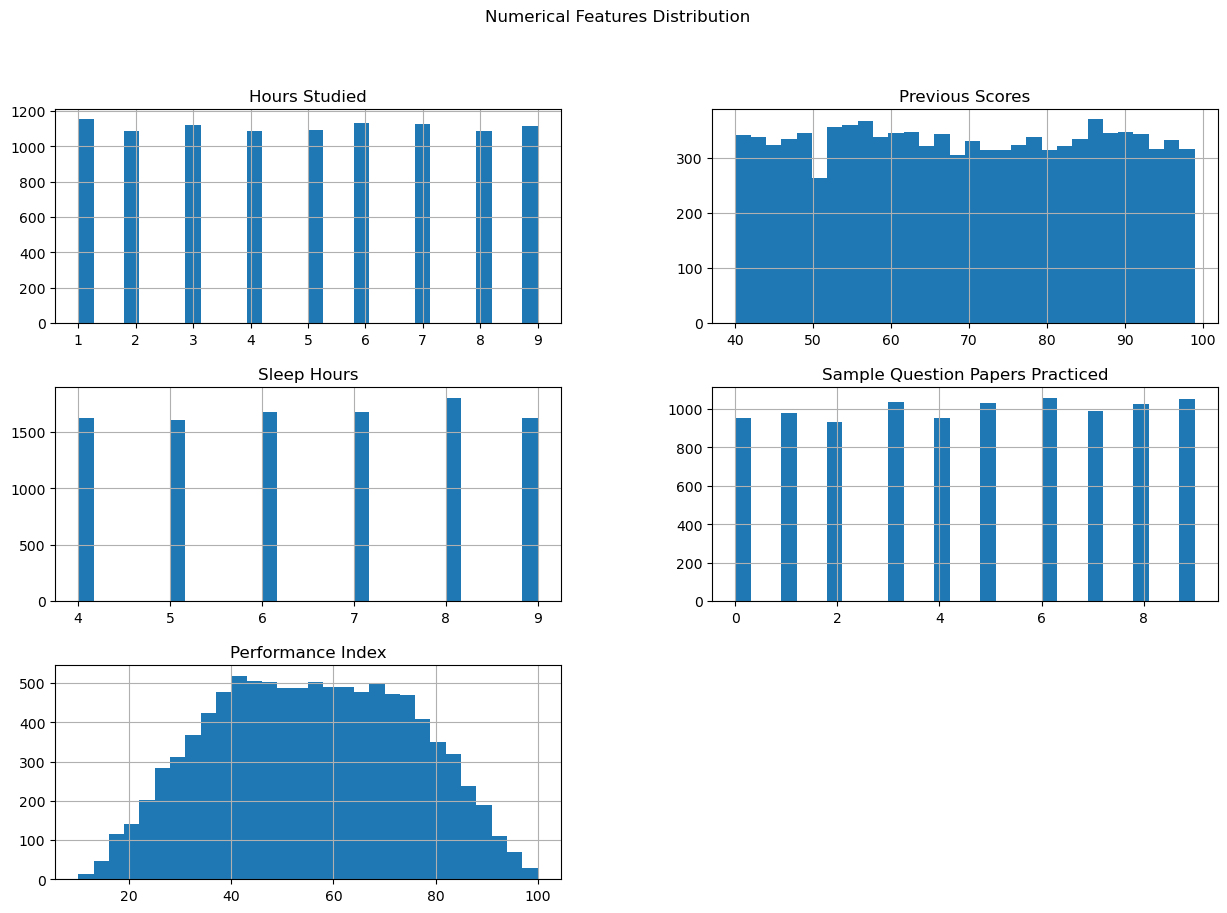

In [104]:
df[numerical_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Numerical Features Distribution")
plt.show()

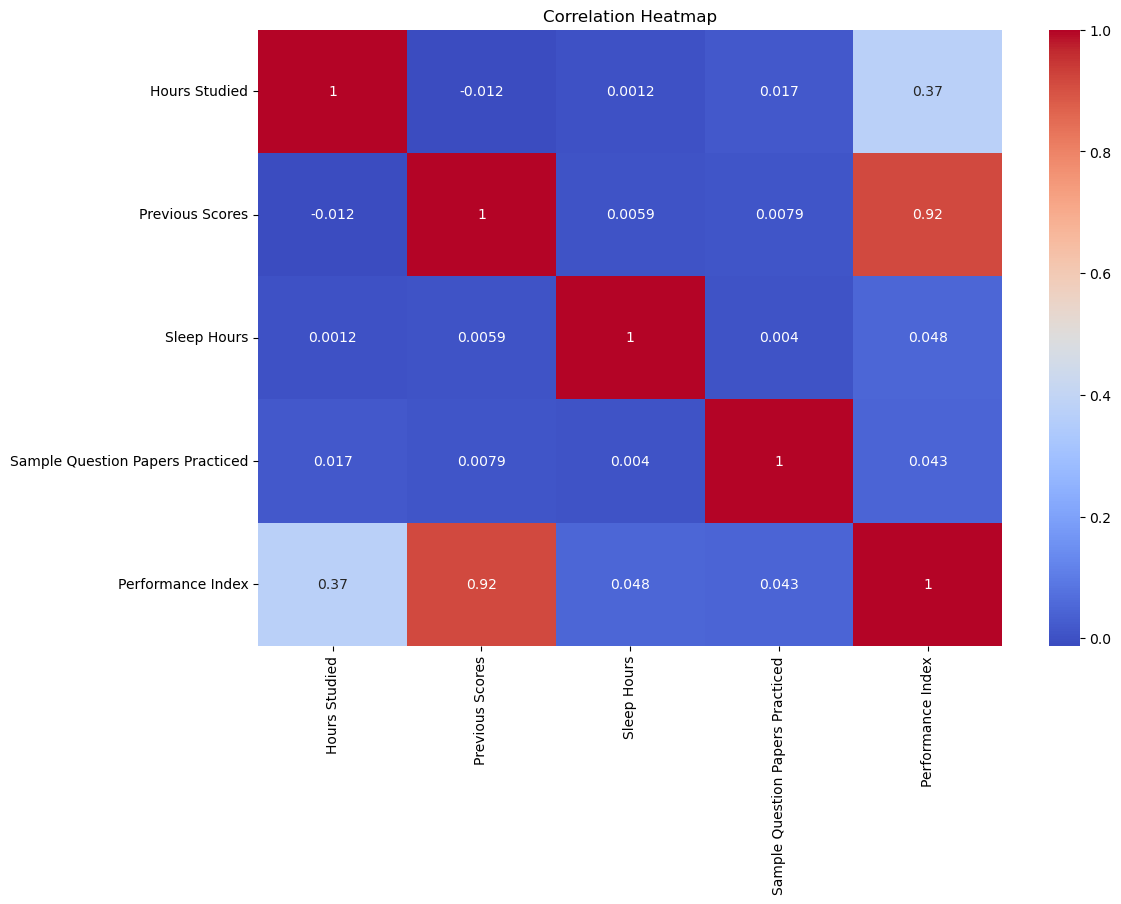

In [105]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [106]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,Yes,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,No,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,Yes,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,Yes,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,No,0.866505,0.145333,0.560870
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,Yes,-1.492294,-0.900982,-1.677362
9996,0.775188,-0.314013,Yes,0.866505,0.145333,0.144454
9997,0.388965,0.781575,Yes,0.866505,0.145333,0.977285
9998,1.547633,1.588851,Yes,0.276805,-1.598526,2.070374


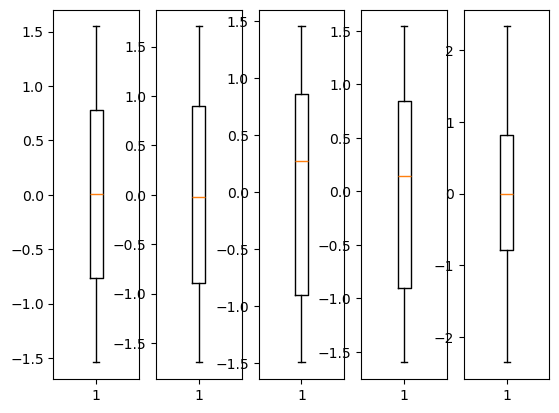

In [107]:
fig ,axs=plt.subplots(1,5)
axs[0].boxplot(df["Hours Studied"])
axs[1].boxplot(df["Previous Scores"])
axs[2].boxplot(df["Sleep Hours"])
axs[3].boxplot(df["Sample Question Papers Practiced"])
axs[4].boxplot(df["Performance Index"])
plt.show()

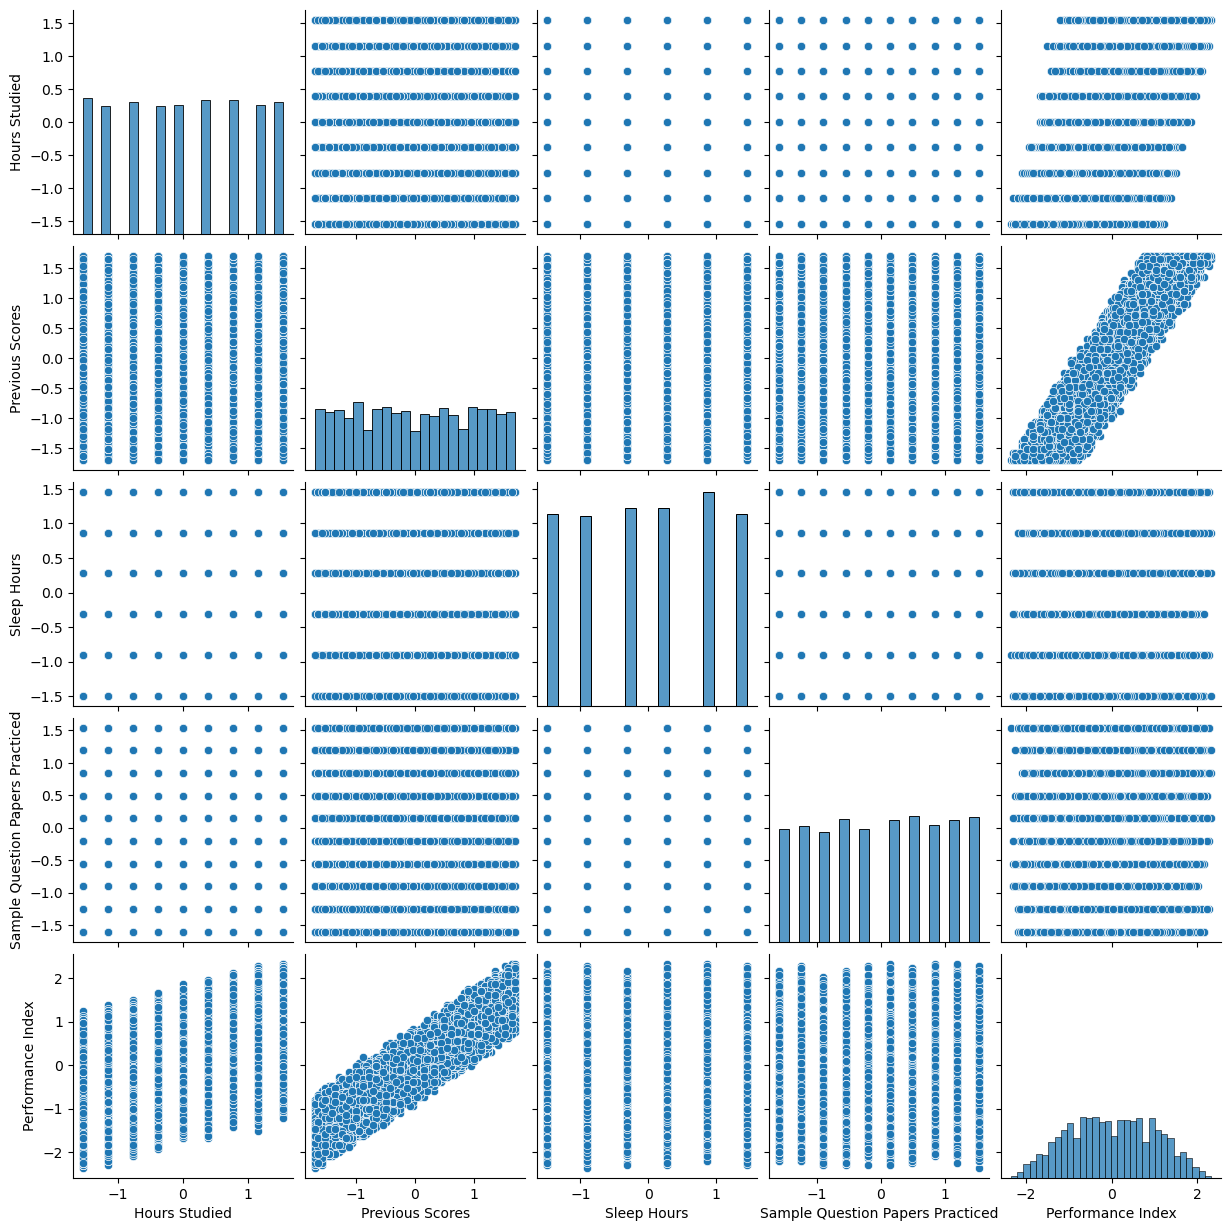

In [108]:
sns.pairplot(df)

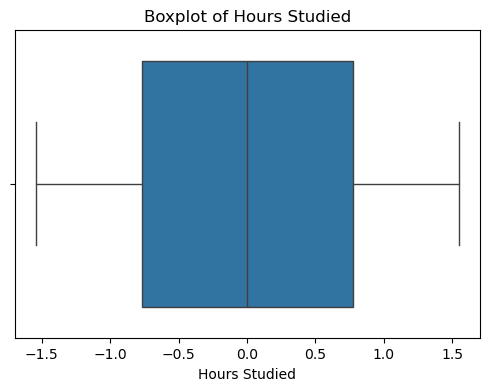

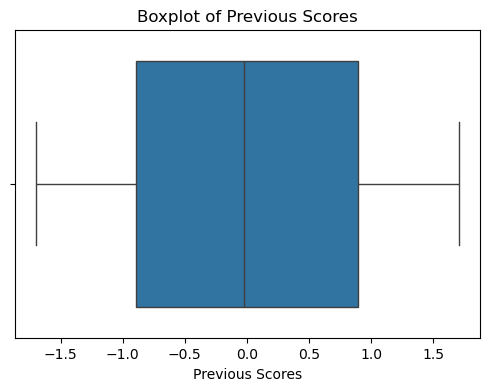

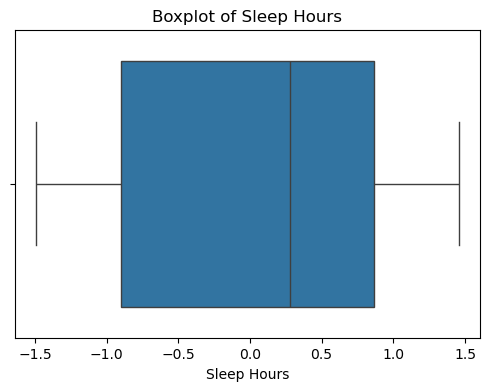

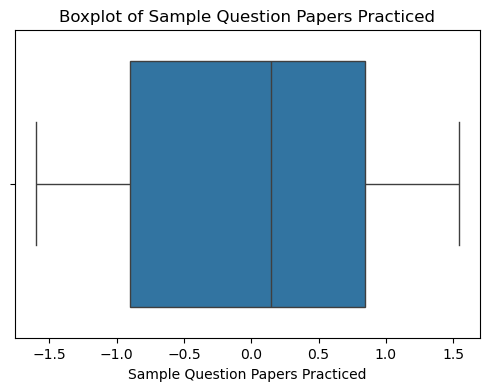

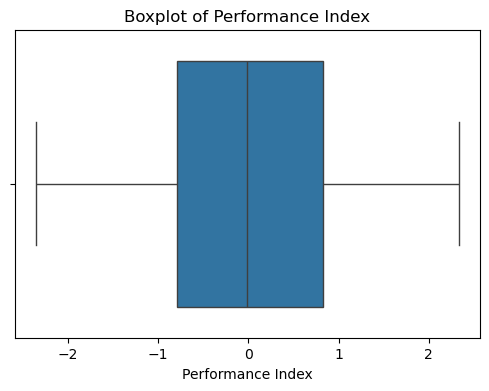

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col)  
    plt.title(f"Boxplot of {col}")
    plt.show()


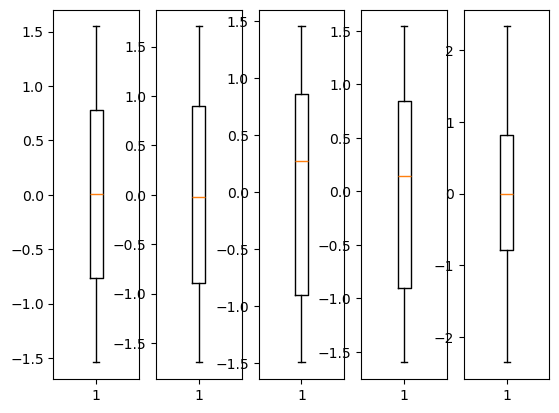

In [110]:
fig ,axs=plt.subplots(1,5)
axs[0].boxplot(df["Hours Studied"])
axs[1].boxplot(df["Previous Scores"])
axs[2].boxplot(df["Sleep Hours"])
axs[3].boxplot(df["Sample Question Papers Practiced"])
axs[4].boxplot(df["Performance Index"])
plt.show()

In [126]:

import pandas as pd

cleaned_data = pd.read_csv(r"D:\DAILY TASKS\Student_Performance.csv")
#cleandata = cleaned_data()
#x = cleaned_data[["Hours Studied", "Previous Scores", "Sleep Hours",
 #                 "Sample Question Papers Practiced"]]

#y = cleaned_data[["Performance Index"]]

#cleaned_data
x = cleaned_data[["Hours Studied", "Previous Scores", "Sleep Hours",
                  "Sample Question Papers Practiced"]]

y = cleaned_data["Performance Index"]
cleaned_data



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_test,y_train, test_size=0.2, random_state=42)
x_train.shape 
y_test.shape

x_test.shape
y_train .shape

model=LinearRegression()
model.fit(x_train,y_train)
model.intercept_, model.coef_
predicted_val=model.predict(x_test)
print(predicted_val)

print(mean_squared_error(y_test,predicted_val))

NameError: name 'x_test' is not defined

In [132]:
from sklearn.preprocessing import PolynomialFeatures

In [133]:
from sklearn.model_selection import train_test_split


polynomial = PolynomialFeatures(degree=2)
poly_features=polynomial.fit_transform(x_train)
model=LinearRegression()
model.fit(poly_features, y_train)

NameError: name 'x_train' is not defined

In [134]:
from sklearn.svm import SVC, SVR